In [1]:
from pomegranate import BayesianNetwork, DiscreteDistribution, ConditionalProbabilityTable, Node, State
import matplotlib.pyplot as plt

In [78]:
angina_pectoris = DiscreteDistribution({0: 0.99, 1: 0.01})
heart_attack = DiscreteDistribution({0: 0.99, 1: 0.01})

pain_syndrome = ConditionalProbabilityTable([
    
    [0, 0, 1, 0.01],
    [0, 0, 0, 0.99],
    
    [0, 1, 1, 0.9],
    [0, 1, 0, 0.1],
    
    [1, 0, 1, 0.9],
    [1, 0, 0, 0.1],
    
    [1, 1, 1, 1],
    [1, 1, 0, 0],
    
], [angina_pectoris, heart_attack])

relief_of_pain = ConditionalProbabilityTable([
    
    [0, 0, 'yes', 0.1],
    [0, 0, 'not_completely', 0.1],
    [0, 0, 'no', 0.1],
    
    [0, 1, 'yes', 0.05],
    [0, 1, 'not_completely', 0.35],
    [0, 1, 'no', 0.6],
    
    [1, 0, 'yes', 0.9],
    [1, 0, 'not_completely', 0.05],
    [1, 0, 'no', 0.05],
    
    [1, 1, 'yes', 0.33],
    [1, 1, 'not_completely', 0.33],
    [1, 1, 'no', 0.33],
    
], [angina_pectoris, heart_attack])

In [79]:
ps = State(pain_syndrome, name='pain_syndrome')
rp = State(relief_of_pain, name='relief_of_pain')
ap = State(angina_pectoris, name='angina_pectoris')
ha = State(heart_attack, name='heart_attack')

In [80]:
model = BayesianNetwork('Medical decision support system')

model.add_states(ps, rp, ap, ha)

In [81]:
model.add_edge(ap, ps)
model.add_edge(ap, rp)

model.add_edge(ha, ps)
model.add_edge(ha, rp)

In [82]:
model.bake()

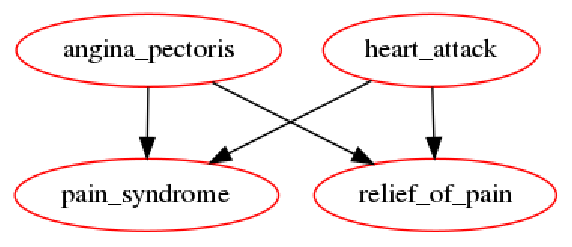

In [83]:
plt.figure(figsize=(10, 10))
model.plot()
plt.show()

### heart_attack

In [84]:
result = model.predict_proba({'pain_syndrome': 1, 'relief_of_pain': 'no'})
print(result)
print('\t'.join([state.name for state in model.states]))

[1 'no'
 {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.925379674392153,
            "1" :0.07462032560784713
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.21241261291094543,
            "1" :0.7875873870890546
        }
    ],
    "frozen" :false
}]
pain_syndrome	relief_of_pain	angina_pectoris	heart_attack


### heart_attack

In [85]:
result = model.predict_proba({'pain_syndrome': 1, 'relief_of_pain': 'not_completely'})
print(result)
print('\t'.join([state.name for state in model.states]))

[1 'not_completely'
 {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.8562763341972283,
            "1" :0.14372366580277166
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.33014355261153494,
            "1" :0.6698564473884651
        }
    ],
    "frozen" :false
}]
pain_syndrome	relief_of_pain	angina_pectoris	heart_attack


### angina_pectoris

In [86]:
result = model.predict_proba({'pain_syndrome': 1, 'relief_of_pain': 'yes'})
print(result)
print('\t'.join([state.name for state in model.states]))

[1 'yes'
 {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.1428557545606674,
            "1" :0.8571442454393325
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.959236275759154,
            "1" :0.040763724240846
        }
    ],
    "frozen" :false
}]
pain_syndrome	relief_of_pain	angina_pectoris	heart_attack


### Not one of diagnosis

In [91]:
result = model.predict_proba({'pain_syndrome': 0, 'relief_of_pain': 'yes'})
# result = model.predict_proba({'pain_syndrome': 0, 'relief_of_pain': 'not_completely'})
# result = model.predict_proba({'pain_syndrome': 0, 'relief_of_pain': 'no'})
print(result)
print('\t'.join([state.name for state in model.states]))

[0 'yes'
 {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.9909066194009126,
            "1" :0.009093380599087493
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.999495969472771,
            "1" :0.0005040305272289871
        }
    ],
    "frozen" :false
}]
pain_syndrome	relief_of_pain	angina_pectoris	heart_attack


### not enough data

In [87]:
result = model.predict_proba({'pain_syndrome': 1})
print(result)
print('\t'.join([state.name for state in model.states]))

[1
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "not_completely" :0.25153535980321334,
            "yes" :0.420243680209086,
            "no" :0.32822095998770084
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.5969716569447359,
            "1" :0.40302834305526414
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.5969716569447362,
            "1" :0.4030283430552638
        }
    ],
    "frozen" :false
}]
pain_syndrome	relief_of_pain	angina_pectoris	heart_attack


In [95]:
model.probability([0, 'yes', 0, 1])

TypeError: list indices must be integers or slices, not tuple

# More complex Bayes Network

In [10]:
# Курение
smoking = DiscreteDistribution({0: 0.35, 1: 0.65})

# ОКН
bowel_obstruction = DiscreteDistribution({0: 0.99, 1: 0.01})

# ХОБЛ
copd = ConditionalProbabilityTable([
    
    [0, 0, 0.94],
    [0, 1, 0.06],
    
    [1, 0, 0.2],
    [1, 1, 0.8],
    
], [smoking])

# Кашель
cough = ConditionalProbabilityTable([
    
    [0, 0, 0.7],
    [0, 1, 0.3],
    
    [1, 0, 0],
    [1, 1, 1],
    
], [copd])

# Инфаркт
heart_attack = ConditionalProbabilityTable([
    
    [0, 0, 0.7],
    [0, 1, 0.3],
    
    [1, 0, 0.2],
    [1, 1, 0.8],
    
],[smoking])

# Одышка
dyspnea = ConditionalProbabilityTable([
    
    [0, 0, 0, 0.9],
    [0, 0, 1, 0.1],

    [0, 1, 0, 0.2],
    [0, 1, 1, 0.8],

    [1, 0, 0, 0.05],
    [1, 0, 1, 0.95],

    [1, 1, 0, 0],
    [1, 1, 1, 1],
    
], [copd, heart_attack])

# Боль в груди
chest_pain_syndrome = ConditionalProbabilityTable([
    
    [0, 0, 1],
    [0, 1, 0],
    
    [1, 0, 0],
    [1, 1, 1],
    
], [heart_attack])

# Боль в эпигастрии
epigastrium_pain_syndrome = ConditionalProbabilityTable([
    
    [0, 0, 0, 1],
    [0, 0, 1, 0],

    [0, 1, 0, 0],
    [0, 1, 1, 1],

    [1, 0, 0, 0.7],
    [1, 0, 1, 0.3],

    [1, 1, 0, 0],
    [1, 1, 1, 1],
    
], [heart_attack, bowel_obstruction])

In [11]:
s = State(smoking, name='smoking')
bo = State(bowel_obstruction, name='bowel_obstruction')
cd = State(copd, name='copd')
cgh = State(cough, name='cough')
ha = State(heart_attack, name='heart_attack')
d = State(dyspnea, name='dyspnea')
cps = State(chest_pain_syndrome, name='chest_pain_syndrome')
eps = State(epigastrium_pain_syndrome, name='epigastrium_pain_syndrome')

In [16]:
model = BayesianNetwork('Medical decision support system')

model.add_states(s, bo, cd, cgh, ha, d, cps, eps)

In [17]:
model.add_edge(s, cd)
model.add_edge(s, ha)

model.add_edge(cd, cgh)
model.add_edge(cd, d)

model.add_edge(ha, d)
model.add_edge(ha, cps)

model.add_edge(ha, eps)
model.add_edge(bo, eps)

In [18]:
model.bake()

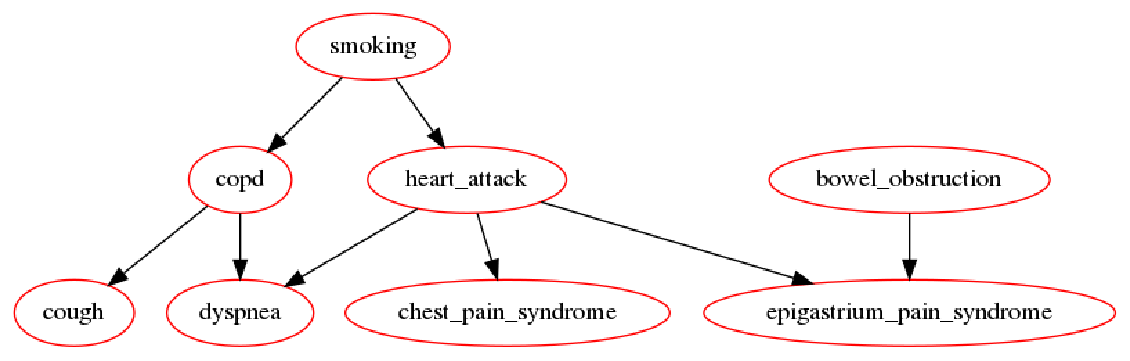

In [19]:
plt.figure(figsize=(20, 20))
model.plot()
plt.show()

In [40]:
result = model.predict_proba({'cough': 1, 'dyspnea': 1})
# print(result)
print('\t'.join([state.name for state in model.states]))

smoking	bowel_obstruction	copd	cough	heart_attack	dyspnea	chest_pain_syndrome	epigastrium_pain_syndrome


In [42]:
result[2]

{
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.12907037691961967,
            "1" :0.8709296230803802
        }
    ],
    "frozen" :false
}

In [37]:
result

array([{
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.06367581983573575,
            "1" :0.9363241801642642
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.9899999999999995,
            "1" :0.010000000000000444
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.10329802865709195,
            "1" :0.8967019713429081
        }
    ],
    "frozen" :false
},
       1,
       {
    "class" :"Distribution",
    "dtype" :"int",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0" :0.0,
            "1" :1.0
        }
    ],
    "frozen" :false
},
       1, 1,
       {
    "class" :"Distribution",
    "dtype" :"int